<a href="https://colab.research.google.com/github/Open-Catalyst-Project/ocp/blob/tutorials_01_11/tutorials/OCP_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MIT License
#
#@title Copyright (c) 2021 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Open Catalyst Project Tutorial Notebook
Author(s):
* [Muhammed Shuaibi](https://mshuaibii.github.io/), CMU, mshuaibi@andrew.cmu.edu
* [Abhishek Das](https://abhishekdas.com/), FAIR, abhshkdz@fb.com 
* [Adeesh Kolluru](https://adeeshkolluru.github.io/), CMU, akolluru@andrew.cmu.edu
* [Brandon Wood](https://wood-b.github.io/), NERSC, bwood@lbl.gov 
* [Janice Lan](https://www.linkedin.com/in/janice-lan), FAIR, janlan@fb.com
* [Anuroop Sriram](https://www.linkedin.com/in/anuroopsriram), FAIR, anuroops@fb.com
* [Zachary Ulissi](https://ulissigroup.cheme.cmu.edu/), CMU, zulissi@andrew.cmu.edu
* [Larry Zitnick](http://larryzitnick.org/), FAIR, zitnick@fb.com

FAIR - Facebook AI Research

CMU - Carnegie Mellon University

NERSC - National Energy Research Scientific Computing Center


## Table of Contents

*   [Background](#background)
*   [Objective](#objective)
*   [Climate Impact](#climate-impact)
*   [Target Audience](#target-audience)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Dataset Overview & Visualization](#data-description)
    *    [Download](#download)
    *    [Visualization](#visual)
    *    [Data contents](#contents)
*   [Tasks](#tasks)
    *    [S2EF](#s2ef)
    *    [IS2RE](#is2re)
    *    [IS2RS](#is2rs)
*   [OCP Calculator](#calc)
*   [Model development](#model-dev)
*   [Running on command line](#cmd)
*   [Limitations](#limit)
*   [Next steps](#steps)
*   [References](#references)

## Background <a name="background"></a>
The discovery of efficient and economic catalysts (materials) are needed to enable the widespread use of renewable energy technologies. A common approach in discovering high performance catalysts is using molecular simulations. Specifically, each simulation models the interaction of a catalyst surface with molecules that are commonly seen in electrochemical reactions. By predicting these interactions accurately, the catalyst's impact on the overall rate of a chemical reaction may be estimated.

An important quantity in screening catalysts is their adsorption energy for the molecules, referred to as `adsorbates', involved in the reaction of interest. The adsorption energy may be found by simulating the interaction of the adsorbate molecule on the surface of the catalyst to find their resting or relaxed energy, i.e., how tightly the adsorbate binds to the catalyst's surface (visualized below). The rate of the chemical reaction, a value of high practical importance, is then commonly approximated using simple functions of the adsorption energy. The goal of this tutorial specifically and the project overall is to encourage research and benchmark progress towards training ML models to approximate this relaxation.

Specifically, during the course of a relaxation, given an initial set of atoms and their positions, the task is to iteratively estimate atomic forces and update atomic positions until a relaxed state is reached. The energy corresponding to the relaxed state is the structure's 'relaxed energy'.

As part of the [Open Catalyst Project](https://github.com/Open-Catalyst-Project/ocp) (OCP), we identify three key tasks ML models need to perform well on in
order to effectively approximate DFT --

 1) Given an **I**nitial **S**tructure, predict the **R**elaxed **E**nergy of the relaxed strucutre (**IS2RE**),

 2) Given an **I**nitial **S**tructure, predict the **R**elaxed **S**tructure (**IS2RS**),

  3) Given any **S**tructure, predict the structure **E**nergy and per-atom **F**orces (**S2EF**).

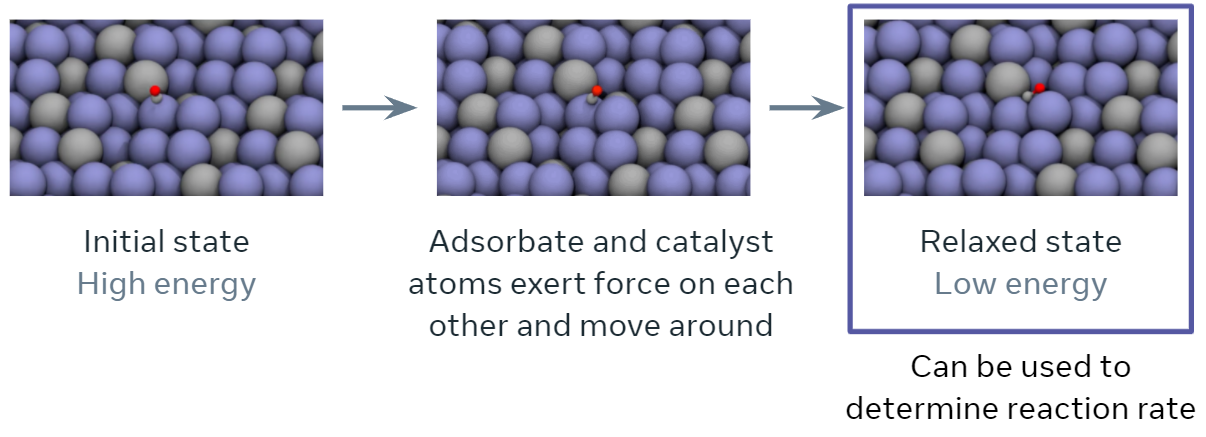

## Objective <a name="objective"></a>
This notebook serves as a tutorial for interacting with the Open Catalyst Project.

By the end of this tutorial, users will have gained:
* Intuition to the dataset and it's properties
* Knowledge of the various OCP tasks: IS2RE, IS2RS, S2EF
* Steps to train, validate, and predict a model on the various tasks
* A walkthrough on creating your own model
* (Optional) Creating your own dataset for other molecular/catalyst applications 
* (Optional) Using pretrained models directly with an [ASE](https://wiki.fysik.dtu.dk/ase/#:~:text=The%20Atomic%20Simulation%20Environment%20(ASE,under%20the%20GNU%20LGPL%20license.)-style calculator.

<a name="climate-impact"></a>
# Climate Impact

Scalable and cost-effective solutions to renewable energy storage are essential to addressing the world’s rising energy needs while reducing climate change. As illustrated in the figure below, as we increase our reliance on renewable energy sources such as wind and solar, which produce intermittent power, storage is needed to transfer power from times of peak generation to peak demand. This may require the storage of power for hours, days, or months. One solution that offers the potential of scaling to nation-sized grids is the conversion of renewable energy to other fuels, such as hydrogen. To be widely adopted, this process requires cost-effective solutions to running chemical reactions.

An open challenge is finding low-cost catalysts to drive these reactions at high rates. Through the use of quantum mechanical simulations (Density Functional Theory, DFT), new catalyst structures can be tested and evaluated. Unfortunately, the high computational cost of these simulations limits the number of structures that may be tested. The use of AI or machine learning may provide a method to efficiently approximate these calculations; reducing the time required from 24} hours to a second. This capability would transform the search for new catalysts from the present day practice of evaluating O(1,000) of handpicked candidates to the brute force search over millions or even billions of candidates.

As part of OCP, we publicly released the world's largest quantum mechanical simulation dataset -- [OC20](https://github.com/Open-Catalyst-Project/ocp/blob/master/DATASET.md) -- in the Fall of 2020 along with a suite of baselines and evaluation metrics. The creation of the dataset required over 70 million hours of compute. This dataset enables the exploration of techniques that will generalize across different catalyst materials and adsorbates. If successful, models trained on the dataset could enable the computational testing of millions of catalyst materials for a wide variety of chemical reactions. However, techniques that achieve the accuracies required** for practical impact are still beyond reach and remain an open area for research, thus encouraging research in this important area to help in meeting the world's energy needs in the decades ahead.

** The computational catalysis community often aims for an adsorption energy MAE of 0.1-0.2 eV for practical relevance.

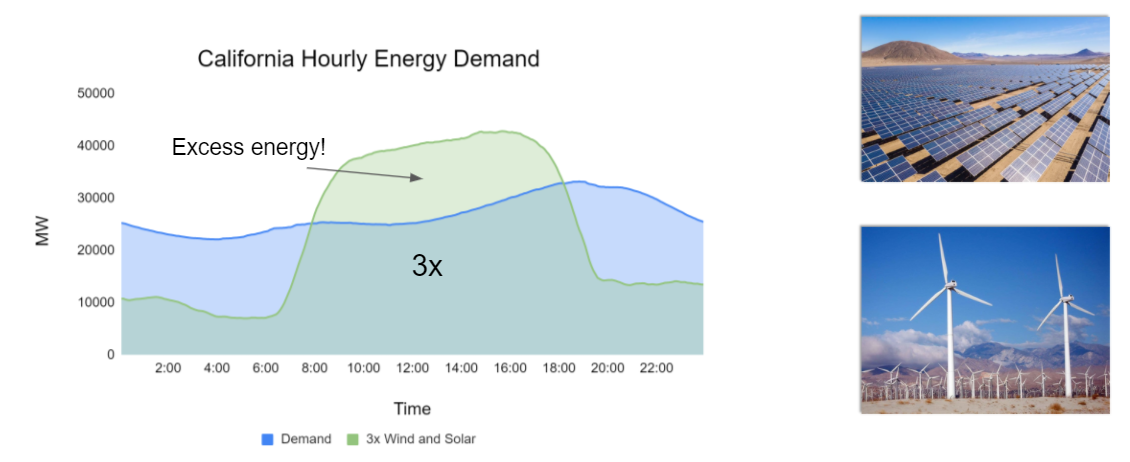

<a name="target-audience"></a>
# Target Audience

This tutorial is designed for those interested in application of ML towards climate change. More specifically, those interested in material/catalyst discovery and Graph Nueral Networks (GNNs) will find lots of benefit here. Little to no domain chemistry knowledge is necessary as it will be covered in the tutorial. Experience with GNNs is a plus but not required. 

We have designed this notebook in a manner to get the ML communnity up to speed as far as background knowledge is concerned, and the catalysis community to better understand how to use the OCP's state-of-the-art models in their everyday workflows.


<a name="background-and-prereqs"></a>
# Background & Prerequisites

Basic experience training ML models. Familiarity with PyTorch. Familiarity with Pytorch-Geometric could be helpful for development, but not required.
No background in chemistry is assumed.

For those looking to apply our pretrained models on their datasets, familiarity with the [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/#:~:text=The%20Atomic%20Simulation%20Environment%20(ASE,under%20the%20GNU%20LGPL%20license.) is useful.


## Background References

To gain an even better understanding of the Open Catalyst Project and the problems it seeks to address, we strongly recommend the following resources:

* To learn more about electrocatalysis, see our [white paper](https://arxiv.org/pdf/2010.09435.pdf).
* To learn about the OC20 dataset and the associated tasks, please see the [OC20 dataset paper](https://arxiv.org/pdf/2010.09990.pdf).


<a name="software-requirements"></a>
# Software Requirements

All required dependencies can be found here - https://github.com/Open-Catalyst-Project/ocp#installation.

For the following Colab Notebook, we manually install the dependencies below.

For the purpose of the demo, we hihgly recommend you use a GPU. Google Colab provides access to 1 GPU (Runtime -> Change runtime type -> select GPU). The tutorial will function without a GPU, but will be slower for training times.

In [1]:
# %%bash
pip install torch==1.7.1+cu110 -f https://download.pytorch.org/whl/torch_stable.html 
pip install demjson==2.2.4 lmdb==1.1.1 ase==3.21 pymatgen==2020.12.31 pyyaml==5.4 tensorboard==2.4 wandb==0.11.2
pip install torch-scatter==2.0.6 torch-sparse==0.6.9 torch-cluster==1.5.9 torch-spline-conv==1.2.1 torch-geometric==1.6.3 -f https://data.pyg.org/whl/torch-1.7.1+cu110.html
git clone https://github.com/Open-Catalyst-Project/ocp.git

In [ ]:
%cd ocp
!pip install -e .

/content/ocp
Obtaining file:///content/ocp
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Running setup.py develop for ocp-models


In [ ]:
import torch
torch.cuda.is_available()

True

<a name="data-description"></a>
# Dataset Overview

The Open Catalyst 2020 Dataset (OC20) will be used throughout this tutorial. More details can be found [here](https://github.com/Open-Catalyst-Project/ocp/blob/master/DATASET.md) and the corresponding [paper](https://arxiv.org/abs/2010.09990). Data is stored in PyTorch Geometric [Data](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html) objects and stored in LMDB files. For each task we include several sized training splits. Validation/Test splits are broken into several subsplits: In Domain (ID), Out of Domain Adsorbate (OOD-Ads), Out of Domain Catalyast (OOD-Cat) and Out of Domain Adsorbate and Catalyst (OOD-Both). Split sizes are summarized below:

Train
* S2EF - 200k, 2M, 20M, 134M(All)
* IS2RE/IS2RS - 10k, 100k, 460k(All)

Val/Test
* S2EF - ~1M across all subsplits
* IS2RE/IS2RS - ~25k across all splits

#### **Tutorial Use**

For the sake of this tutorial we provide much smaller splits (100 train, 20 val for all tasks) to allow users to easily store, train, and predict across the various tasks. Please refer [here](https://github.com/Open-Catalyst-Project/ocp#download-data) for details on how to download the full datasets for general use.

 

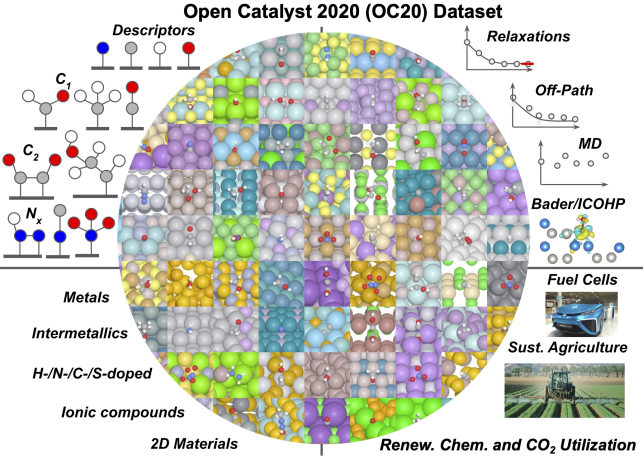

## Data Download [~1min] <a name="download"></a>
FOR TUTORIAL USE ONLY

In [2]:
%%bash
mkdir data
cd data
wget -q http://dl.fbaipublicfiles.com/opencatalystproject/data/tutorial_data.tar.gz -O tutorial_data.tar.gz
tar -xzvf tutorial_data.tar.gz
rm tutorial_data.tar.gz

## Data Visualization <a name="visual"></a>

In [ ]:
import matplotlib
matplotlib.use('Agg')

import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'font.family': ' DejaVu Sans',
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'axes.labelsize': 25,
   'axes.titlesize': 25,
   'text.usetex': False,
   'figure.figsize': [12, 12]
}
matplotlib.rcParams.update(params)


import ase.io
from ase.io.trajectory import Trajectory
from ase.io import extxyz
from ase.calculators.emt import EMT
from ase.build import fcc100, add_adsorbate, molecule
from ase.constraints import FixAtoms
from ase.optimize import LBFGS
from ase.visualize.plot import plot_atoms
from ase import Atoms
from IPython.display import Image

### Understanding the data
We use the Atomic Simulation Environment (ASE) library to interact with our data. This notebook will provide you with some intuition on how atomic data is generated, how the data is structured, how to visualize the data, and the specific properties that are passed on to our models.

### Generating sample data

The OC20 dataset was generated using density functional theory (DFT), a quantum chemistry method for modeling atomistic environments. For more details, please see our dataset paper.  In this notebook, we generate sample data in the same format as the OC20 dataset; however, we use a faster method that is less accurate called effective-medium theory (EMT) because our DFT calculations are too computationally expensive to run here. EMT is great for demonstration purposes but not accurate enough for our actual catalysis applications. Below is a structural relaxation of a catalyst system, a propane (C3H8) adsorbate on a copper (Cu) surface. Throughout this tutorial a surface may be referred to as a slab and the combination of an adsorbate and a surface as an adslab.

### Structural relaxations

A structural relaxation or structure optimization is the process of iteratively updating atom positions to find the atom positions that minimize the energy of the structure. Standard optimization methods are used in structural relaxations — below we use the Limited-Memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS) algorithm. The step number, time, energy, and force max are printed at each optimization step. Each step is considered one example because it provides all the information we need to train models for the S2EF task and the entire set of steps is referred to as a trajectory. Visualizing intermediate structures or viewing the entire trajectory can be illuminating to understand what is physically happening and to look for problems in the simulation, especially when we run ML-driven relaxations. Common problems one may look out for - atoms excessively overlapping/colliding with each other and atoms flying off into random directions.

In [ ]:
###DATA GENERATION - FEEL FREE TO SKIP###

# This cell sets up and runs a structural relaxation 
# of a propane (C3H8) adsorbate on a copper (Cu) surface

adslab = fcc100("Cu", size=(3, 3, 3))
adsorbate = molecule("C3H8")
add_adsorbate(adslab, adsorbate, 3, offset=(1, 1)) # adslab = adsorbate + slab

# tag all slab atoms below surface as 0, surface as 1, adsorbate as 2
tags = np.zeros(len(adslab))
tags[18:27] = 1
tags[27:] = 2

adslab.set_tags(tags)

# Fixed atoms are prevented from moving during a structure relaxation. 
# We fix all slab atoms beneath the surface. 
cons= FixAtoms(indices=[atom.index for atom in adslab if (atom.tag == 0)])
adslab.set_constraint(cons)
adslab.center(vacuum=13.0, axis=2)
adslab.set_pbc(True)
adslab.set_calculator(EMT())

os.makedirs('data', exist_ok=True)

# Define structure optimizer - LBFGS. Run for 100 steps, 
# or if the max force on all atoms (fmax) is below 0 ev/A.
# fmax is typically set to 0.01-0.05 eV/A, 
# for this demo however we run for the full 100 steps.

dyn = LBFGS(adslab, trajectory="data/toy_c3h8_relax.traj")
dyn.run(fmax=0, steps=100)

traj = ase.io.read("data/toy_c3h8_relax.traj", ":")

# convert traj format to extxyz format (used by OC20 dataset)
columns = (['symbols','positions', 'move_mask', 'tags'])
with open('data/toy_c3h8_relax.extxyz','w') as f:
    extxyz.write_xyz(f, traj, columns=columns)

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 01:59:21       15.804700*       6.7764
LBFGS:    1 01:59:21       12.190607*       4.3232
LBFGS:    2 01:59:21       10.240169*       2.2655
LBFGS:    3 01:59:22        9.779223*       0.9372
LBFGS:    4 01:59:22        9.671525*       0.7702
LBFGS:    5 01:59:22        9.574461*       0.6635
LBFGS:    6 01:59:22        9.537502*       0.5718
LBFGS:    7 01:59:22        9.516673*       0.4466
LBFGS:    8 01:59:22        9.481330*       0.4611
LBFGS:    9 01:59:22        9.462255*       0.2931
LBFGS:   10 01:59:22        9.448937*       0.2490
LBFGS:   11 01:59:22        9.433813*       0.2371
LBFGS:   12 01:59:22        9.418884*       0.2602
LBFGS:   13 01:59:23        9.409649*       0.2532
LBFGS:   14 01:59:23        9.404838*       0.1624
LBFGS:   15 01:59:23        9.401753*       0.1823
LBFGS:   16 01:59:23        9.397314*       0.2592
LBFGS:   17 01:59:23        9.3879

/usr/local/lib/python3.7/dist-packages/ase/io/extxyz.py:302: UserWarning: Skipping unhashable information adsorbate_info
  '{0}'.format(key))


### Reading a trajectory

In [ ]:
identifier = "toy_c3h8_relax.extxyz"

# the `index` argument corresponds to what frame of the trajectory to read in, specifiying ":" reads in the full trajectory.
traj = ase.io.read(f"data/{identifier}", index=":")

### Viewing a trajectory

Below we visualize the initial, middle, and final steps in the structural relaxation trajectory from above. Copper atoms in the surface are colored orange, the propane adsorbate on the surface has grey colored carbon atoms and white colored hydrogen atoms. The adsorbate’s structure changes during the simulation and you can see how it relaxes on the surface. In this case, the relaxation looks normal; however, there can be instances where the adsorbate flies away (desorbs) from the surface or the adsorbate can break apart (dissociation), which are hard to detect without visualization. Additionally, visualizations can be used as a quick sanity check to ensure the initial system is set up correctly and there are no major issues with the simulation.


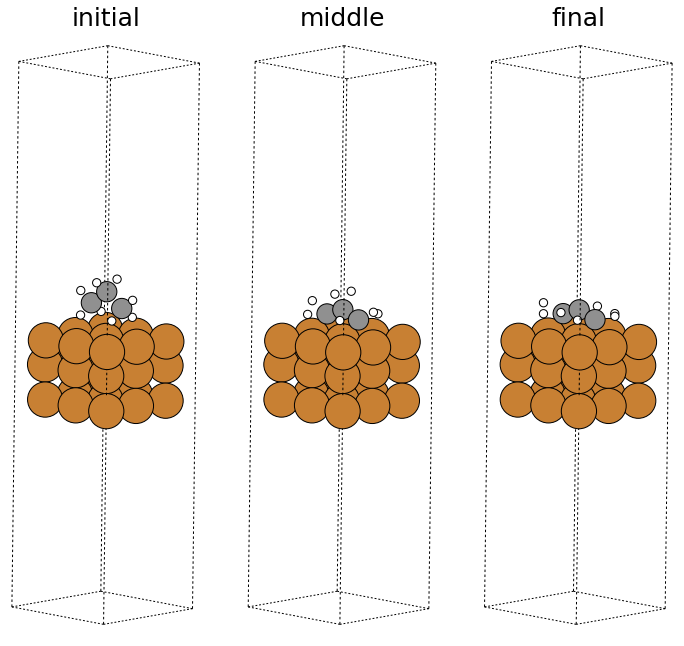

In [ ]:
fig, ax = plt.subplots(1, 3)
labels = ['initial', 'middle', 'final']
for i in range(3):
    ax[i].axis('off')
    ax[i].set_title(labels[i])
ase.visualize.plot.plot_atoms(traj[0], 
                              ax[0], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[50], 
                              ax[1], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[-1], 
                              ax[2], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))

### Data contents <a name="contents"></a>

Here we take a closer look at what information is contained within these trajectories.

In [ ]:
i_structure = traj[0]
i_structure

Atoms(symbols='Cu27C3H8', pbc=True, cell=[7.65796644025031, 7.65796644025031, 33.266996999999996], energies=..., forces=..., tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), calculator=SinglePointCalculator(...))

#### Atomic numbers

In [ ]:
numbers = i_structure.get_atomic_numbers()
print(numbers)

[29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29  6  6  6  1  1  1  1  1  1  1  1]


#### Atomic symbols

In [ ]:
symbols = np.array(i_structure.get_chemical_symbols())
print(symbols)

['Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu'
 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'C' 'C'
 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']


#### Unit cell

The unit cell is the volume containing our system of interest. Express as a 3x3 array representing the directional vectors that make up the volume. Illustrated as the dashed box in the above visuals.

In [ ]:
cell = np.array(i_structure.cell)
print(cell)

[[ 7.65796644  0.          0.        ]
 [ 0.          7.65796644  0.        ]
 [ 0.          0.         33.266997  ]]


#### Periodic boundary conditions (PBC)

x,y,z boolean representing whether a unit cell repeats in the corresponding directions. The OC20 dataset sets this to [True, True, True], with a large enough vacuum layer above the surface such that a unit cell does not see itself in the z direction. Although the original structure shown above is what get's passed into our models, the presence of PBC allows it to effectively repeat infinitely in the x and y directions. Below we visualize the same structure with a periodicity of 2 in all directions, what the model may effectively see.

In [ ]:
pbc = i_structure.pbc
print(pbc)

[ True  True  True]


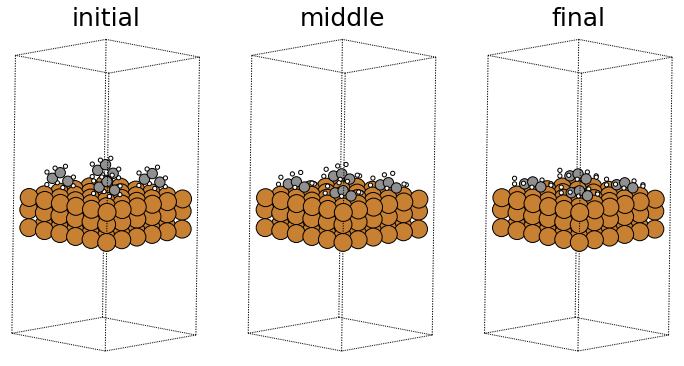

In [ ]:
fig, ax = plt.subplots(1, 3)
labels = ['initial', 'middle', 'final']
for i in range(3):
    ax[i].axis('off')
    ax[i].set_title(labels[i])

ase.visualize.plot.plot_atoms(traj[0].repeat((2,2,1)), 
                              ax[0], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[50].repeat((2,2,1)), 
                              ax[1], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[-1].repeat((2,2,1)), 
                              ax[2], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))

#### Tags

The OC20 dataset consists of systems with several different types of atoms. To help with identifying the index of certain atoms, we tag each atom according to where it is found in the system. There are three categories of atoms: 
- *sub-surface slab atoms*: these are atoms in the bottom layers of the catalyst, furthest away from the adsorbate
- *surface slab atoms*: these are atoms in the top layers of the catalyst, close to where the adsorbate will be placed   
- *adsorbate atoms*: atoms that make up the adsorbate molecule on top of the catalyst.

Tag:

0 - Sub-surface slab atoms

1 - Surface slab atoms

2 - Adsorbate atoms


In [ ]:
tags = i_structure.get_tags()
print(tags)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2]


#### Fixed atoms constraint

In reality, surfaces contain many, many more atoms beneath what we've illustrated as the surface. At an infinite depth, these subsurface atoms would look just like the bulk structure. We approximate a true surface by fixing the subsurface atoms into their “bulk” locations. This ensures that they cannot move at the “bottom” of the surface. If they could, this would throw off our calculations. Consistent with the above, we fix all atoms with tags=0, and denote them as "fixed". All other atoms are considered "free".

In [ ]:
cons = i_structure.constraints[0]
print(cons, '\n')

# indices of fixed atoms
indices = cons.index
print(indices, '\n')

# fixed atoms correspond to tags = 0
print(tags[indices])

FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Adsorption energy

The energy of the system is one of the properties of interest in the OC20 dataset. It's important to note that absolute energies provide little value to researchers and must be referenced properly to be useful. The OC20 dataset references all it's energies to the bare slab + gas references to arrive at adsorption energies. Adsorption energies are important in studying catalysts and their corresponding reaction rates. In addition to the structure relaxations of the OC20 dataset, bare slab and gas (N2, H2, H2O, CO) relaxations were carried out with DFT in order to calculate adsorption energies.

In [ ]:
final_structure = traj[-1]
relaxed_energy = final_structure.get_potential_energy()
print(f'Relaxed absolute energy = {relaxed_energy} eV')

# Corresponding raw slab used in original adslab (adsorbate+slab) system. 
raw_slab = fcc100("Cu", size=(3, 3, 3))
raw_slab.set_calculator(EMT())
raw_slab_energy = raw_slab.get_potential_energy()
print(f'Raw slab energy = {raw_slab_energy} eV')


adsorbate = Atoms("C3H8").get_chemical_symbols()
# For clarity, we define arbitrary gas reference energies here.
# A more detailed discussion of these calculations can be found in the corresponding paper's SI. 
gas_reference_energies = {'H': .3, 'O': .45, 'C': .35, 'N': .50}

adsorbate_reference_energy = 0
for ads in adsorbate:
    adsorbate_reference_energy += gas_reference_energies[ads]

print(f'Adsorbate reference energy = {adsorbate_reference_energy} eV\n')

adsorption_energy = relaxed_energy - raw_slab_energy - adsorbate_reference_energy
print(f'Adsorption energy: {adsorption_energy} eV')

Relaxed absolute energy = 8.358921451420816 eV
Raw slab energy = 8.127167122751231 eV
Adsorbate reference energy = 3.4499999999999993 eV

Adsorption energy: -3.218245671330415 eV


#### Plot energy profile of toy trajectory

Plotting the energy profile of our trajectory is a good way to ensure nothing strange has occured. We expect to see a decreasing monotonic function. If the energy is consistently increasing or there's multiple large spikes this could be a sign of some issues in the optimization. This is particularly useful for when analyzing ML-driven relaxations and whether they make general physical sense.

Text(0, 0.5, 'Energy, eV')

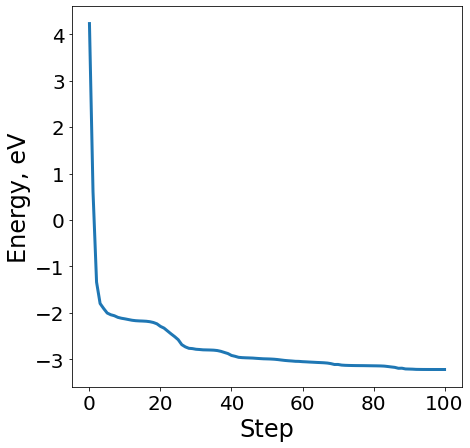

In [ ]:
energies = [image.get_potential_energy() - raw_slab_energy - adsorbate_reference_energy for image in traj]

plt.figure(figsize=(7, 7))
plt.plot(range(len(energies)), energies, lw=3)
plt.xlabel("Step", fontsize=24)
plt.ylabel("Energy, eV", fontsize=24)

#### Force

Forces are another important property of the OC20 dataset. Unlike datasets like QM9 which contain only ground state properties, the OC20 dataset contains per-atom forces necessary to carry out atomistic simulations. Physically, forces are the negative gradient of energy w.r.t atomic positions: $F = -\frac{dE}{dx}$. Although not mandatory (depending on the application), maintaining this energy-force consistency is important for models that seek to make predictions on both properties.

The "apply_constraint" argument controls whether to apply system constraints to the forces. In the OC20 dataset, this controls whether to return forces for fixed atoms (apply_constraint=False) or return 0s (apply_constraint=True).

In [ ]:
# Returning forces for all atoms - regardless of whether "fixed" or "free"
i_structure.get_forces(apply_constraint=False)

array([[-1.07900000e-05, -3.80000000e-06,  1.13560540e-01],
       [-0.00000000e+00, -4.29200000e-05,  1.13302410e-01],
       [ 1.07900000e-05, -3.80000000e-06,  1.13560540e-01],
       [-1.84600000e-05,  0.00000000e+00,  1.13543430e-01],
       [ 0.00000000e+00, -0.00000000e+00,  1.13047800e-01],
       [ 1.84600000e-05,  0.00000000e+00,  1.13543430e-01],
       [-1.07900000e-05,  3.80000000e-06,  1.13560540e-01],
       [-0.00000000e+00,  4.29200000e-05,  1.13302410e-01],
       [ 1.07900000e-05,  3.80000000e-06,  1.13560540e-01],
       [-1.10430500e-02, -2.53094000e-03, -4.84573700e-02],
       [ 1.10430500e-02, -2.53094000e-03, -4.84573700e-02],
       [ 0.00000000e+00, -2.20890000e-04, -2.07827000e-03],
       [-1.10430500e-02,  2.53094000e-03, -4.84573700e-02],
       [ 1.10430500e-02,  2.53094000e-03, -4.84573700e-02],
       [-0.00000000e+00,  2.20890000e-04, -2.07827000e-03],
       [-3.49808000e-03, -0.00000000e+00, -7.85544000e-03],
       [ 3.49808000e-03, -0.00000000e+00

In [ ]:
# Applying the fixed atoms constraint to the forces
i_structure.get_forces(apply_constraint=True)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.31814437, -0.23642045, -0.39708923],
       [ 0.        , -2.18895316, -2.74768262],
       [ 0.31814437, -0.23642045, -0.397

### Interacting with the OC20 datasets

The OC20 datasets are stored in LMDBs. Here we show how to interact with the datasets directly in order to better understand the data. We use two seperate classes to read in the approriate datasets:

*S2EF* - We use the [TrajectoryLmdbDataset](https://github.com/Open-Catalyst-Project/ocp/blob/master/ocpmodels/datasets/trajectory_lmdb.py) object to read in a **directory** of LMDB files containing the dataset.

*IS2RE/IS2RS* - We use the [SinglePointLmdbDataset](https://github.com/Open-Catalyst-Project/ocp/blob/master/ocpmodels/datasets/single_point_lmdb.py) class to read in a **single LMDB file** containing the dataset.



In [ ]:
from ocpmodels.datasets import TrajectoryLmdbDataset, SinglePointLmdbDataset

# TrajectoryLmdbDataset is our custom Dataset method to read the lmdbs as Data objects. Note that we need to give the path to the folder containing lmdbs for S2EF
dataset = TrajectoryLmdbDataset({"src": "data/s2ef/train_100/"})

print("Size of the dataset created:", len(dataset))
print(dataset[0])

Size of the dataset created: 100
Data(atomic_numbers=[86], cell=[1, 3, 3], cell_offsets=[2964, 3], edge_index=[2, 2964], fid=[1], fixed=[86], force=[86, 3], id="0_0", natoms=86, pos=[86, 3], sid=[1], tags=[86], total_frames=74, y=6.282500615000004)


In [ ]:
data = dataset[0]
data

Data(atomic_numbers=[86], cell=[1, 3, 3], cell_offsets=[2964, 3], edge_index=[2, 2964], fid=[1], fixed=[86], force=[86, 3], id="0_0", natoms=86, pos=[86, 3], sid=[1], tags=[86], total_frames=74, y=6.282500615000004)

In [ ]:
energies = torch.tensor([data.y for data in dataset])
energies

tensor([ 6.2825e+00,  4.1290e+00,  3.1451e+00,  3.0260e+00,  1.7921e+00,
         1.6451e+00,  1.2257e+00,  1.2161e+00,  1.0712e+00,  7.4727e-01,
         5.9575e-01,  5.7016e-01,  4.2819e-01,  3.1616e-01,  2.5283e-01,
         2.2425e-01,  2.2346e-01,  2.0530e-01,  1.6090e-01,  1.1807e-01,
         1.1691e-01,  9.1254e-02,  7.4997e-02,  6.3274e-02,  5.2782e-02,
         4.8892e-02,  3.9609e-02,  3.1746e-02,  2.7179e-02,  2.7007e-02,
         2.3709e-02,  1.8005e-02,  1.7676e-02,  1.4129e-02,  1.3162e-02,
         1.1374e-02,  7.4124e-03,  7.7525e-03,  6.1224e-03,  5.2787e-03,
         2.8587e-03,  1.1835e-04, -1.1200e-03, -1.3011e-03, -2.6812e-03,
        -5.9202e-03, -6.1644e-03, -6.9261e-03, -9.1364e-03, -9.2114e-03,
        -1.0665e-02, -1.3760e-02, -1.3588e-02, -1.4895e-02, -1.6190e-02,
        -1.8660e-02, -1.4980e-02, -1.8880e-02, -2.0218e-02, -2.0559e-02,
        -2.1013e-02, -2.2129e-02, -2.2748e-02, -2.3322e-02, -2.3382e-02,
        -2.3865e-02, -2.3973e-02, -2.4196e-02, -2.4

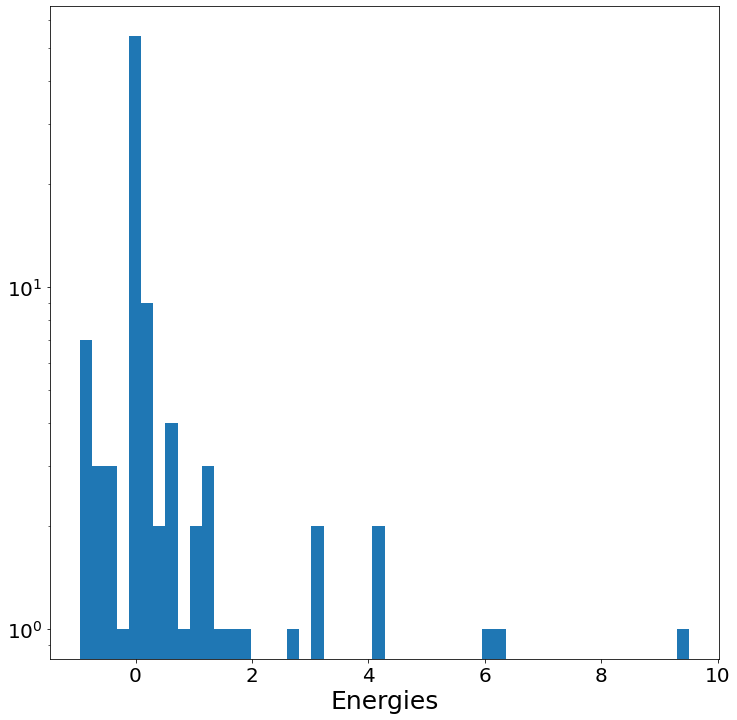

In [ ]:
plt.hist(energies, bins = 50)
plt.yscale("log")
plt.xlabel("Energies")
plt.show()

### Additional Resources

More helpful resources, tutorials, and documentation can be found at ASE's webpage: https://wiki.fysik.dtu.dk/ase/index.html. We point to specific pages that may be of interest:

* Interacting with Atoms Object: https://wiki.fysik.dtu.dk/ase/ase/atoms.html
* Visualization: https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html
* Structure optimization: https://wiki.fysik.dtu.dk/ase/ase/optimize.html
* More ASE Tutorials: https://wiki.fysik.dtu.dk/ase/tutorials/tutorials.html

<a name="tasks"></a>
# Tasks

In this section, we cover the different types of tasks the OC20 dataset presents and how to train and predict their corresponding models.

1. Structure to Energy and Forces (S2EF)
2. Initial Structure to Relaxed Energy (IS2RE)
3. Initial Structure to Relaxed Structure (IS2RS)

Tasks can be interrelated. The figure below illustrates several approaches to solving the IS2RE task:

(a) the traditional approach uses DFT along with an optimizer,
such as BFGS or conjugate gradient, to iteratively update
the atom positions until the relaxed structure and energy are found.

(b) using ML models trained to predict the energy and forces of a
structure, S2EF can be used as a direct replacement for DFT. 

(c) the relaxed structure could potentially be directly regressed from
the initial structure and S2EF used to find the energy.

(d) directly compute the relaxed energy from the initial state.


**NOTE** The following sections are intended to demonstrate the inner workings of our codebase and what goes into running the various tasks. We do not recommend training to completion within a notebook setting. Please see the [running on command line](#cmd) section for the preferred way to train/evaluate models.

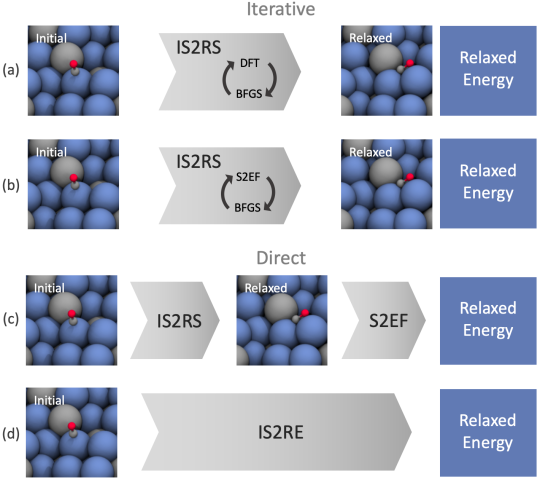

## Structure to Energy and Forces (S2EF) <a name="s2ef"></a>

The S2EF task takes an atomic system as input and predicts the energy of the entire system and forces on each atom. This is our most general task, ultimately serving as a surrogate to DFT. A model that can perform well on this task can accelerate other applications like molecular dynamics and transitions tate calculations.

### Steps for training an S2EF model
1) Define or load a configuration (config), which includes the following
* task
* model
* optimizer
* dataset
* trainer

2) Create a ForcesTrainer object

3) Train the model

4) Validate the model

**For storage and compute reasons we use a very small subset of the OC20 S2EF dataset for this tutorial. Results will be considerably worse than presented in our paper.**

### Imports

In [ ]:
from ocpmodels.trainers import ForcesTrainer
from ocpmodels.datasets import TrajectoryLmdbDataset
from ocpmodels import models
from ocpmodels.common import logger
from ocpmodels.common.utils import setup_logging
setup_logging()

import numpy as np
import copy
import os

### Dataset

In [ ]:
train_src = "data/s2ef/train_100"
val_src = "data/s2ef/val_20"

### Normalize data

If you wish to normalize the targets we must compute the mean and standard deviation for our energy values. Because forces are physically related by the negative gradient of energy, we use the same multiplicative energy factor for forces.

In [ ]:
train_dataset = TrajectoryLmdbDataset({"src": train_src})

energies = []
for data in train_dataset:
  energies.append(data.y)

mean = np.mean(energies)
stdev = np.std(energies)

### Define the Config

For this example, we will explicitly define the config; however, a set of default configs can be found [here](https://github.com/Open-Catalyst-Project/ocp/tree/master/configs). Default config yaml files can easily be loaded with the following [utility](https://github.com/Open-Catalyst-Project/ocp/blob/aa8e44d50229fce887b3a94a5661c4f85cd73eed/ocpmodels/common/utils.py#L361-L400). Loading a yaml config is preferrable when launching jobs from the command line. We have included our best models' config files here for reference. 

**Note** - we only train for a single epoch with a reduced batch size (GPU memory constraints) for demonstration purposes, modify accordingly for full convergence.

In [ ]:
# Task
task = {
    'dataset': 'trajectory_lmdb', # dataset used for the S2EF task
    'description': 'Regressing to energies and forces for DFT trajectories from OCP',
    'type': 'regression',
    'metric': 'mae',
    'labels': ['potential energy'],
    'grad_input': 'atomic forces',
    'train_on_free_atoms': True,
    'eval_on_free_atoms': True
}
# Model
model = {
    'name': 'gemnet_t',
    "num_spherical": 7,
    "num_radial": 128,
    "num_blocks": 3,
    "emb_size_atom": 512,
    "emb_size_edge": 512,
    "emb_size_trip": 64,
    "emb_size_rbf": 16,
    "emb_size_cbf": 16,
    "emb_size_bil_trip": 64,
    "num_before_skip": 1,
    "num_after_skip": 2,
    "num_concat": 1,
    "num_atom": 3,
    "cutoff": 6.0,
    "max_neighbors": 50,
    "rbf": {"name": "gaussian"},
    "envelope": {
      "name": "polynomial",
      "exponent": 5,
    },
    "cbf": {"name": "spherical_harmonics"},
    "extensive": True,
    "otf_graph": False,
    "output_init": "HeOrthogonal",
    "activation": "silu",
    "scale_file": "configs/s2ef/all/gemnet/scaling_factors/gemnet-dT.json",
    "regress_forces": True,
    "direct_forces": True,
}
# Optimizer
optimizer = {
    'batch_size': 1,         # originally 32
    'eval_batch_size': 1,    # originally 32
    'num_workers': 2,
    'lr_initial': 5.e-4,
    'optimizer': 'AdamW',
    'optimizer_params': {"amsgrad": True},
    'scheduler': "ReduceLROnPlateau",
    'mode': "min",
    'factor': 0.8,
    'patience': 3,
    'max_epochs': 1,         # used for demonstration purposes
    'force_coefficient': 100,
    'ema_decay': 0.999,
    'clip_grad_norm': 10,
    'loss_energy': 'mae',
    'loss_force': 'l2mae',
}
# Dataset
dataset = [
  {'src': train_src,
   'normalize_labels': True,
   "target_mean": mean,
   "target_std": stdev,
   "grad_target_mean": 0.0,
   "grad_target_std": stdev
   }, # train set 
  {'src': val_src}, # val set (optional)
]

### Create the trainer

In [ ]:
trainer = ForcesTrainer(
    task=task,
    model=copy.deepcopy(model), # copied for later use, not necessary in practice.
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    is_vis=False,
    print_every=5,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage),
)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2021-11-22-17-14-40-S2EF-example
  commit: bc04a90
  identifier: S2EF-example
  logs_dir: ./logs/tensorboard/2021-11-22-17-14-40-S2EF-example
  print_every: 5
  results_dir: ./results/2021-11-22-17-14-40-S2EF-example
  seed: 0
  timestamp_id: 2021-11-22-17-14-40-S2EF-example
dataset:
  grad_target_mean: 0.0
  grad_target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - &id001 !!python/object/apply:numpy.dtype
    args:
    - f8
    - false
    - true
    state: !!python/tuple
    - 3
    - <
    - null
    - null
    - null
    - -1
    - -1
    - 0
  - !!binary |
    dPVlWhRA+D8=
  normalize_labels: true
  src: data/s2ef/train_100
  target_mean: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    zSXlDMrm3D8=
  target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    dPVlWhRA+D8=
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cb

2021-11-22 17:15:20 (WARNING): Model gradient logging to tensorboard not yet supported.


In [3]:
trainer.model

### Train the model

In [ ]:
trainer.train()

2021-11-22 17:15:33 (INFO): forcesx_mae: 2.37e+00, forcesy_mae: 3.27e+00, forcesz_mae: 3.07e+00, forces_mae: 2.90e+00, forces_cos: -4.09e-02, forces_magnitude: 5.73e+00, energy_mae: 4.82e+01, energy_force_within_threshold: 0.00e+00, loss: 8.53e+02, lr: 5.00e-04, epoch: 5.00e-02, step: 5.00e+00
2021-11-22 17:15:39 (INFO): forcesx_mae: 2.42e+00, forcesy_mae: 3.28e+00, forcesz_mae: 3.03e+00, forces_mae: 2.91e+00, forces_cos: -1.82e-02, forces_magnitude: 5.77e+00, energy_mae: 4.96e+01, energy_force_within_threshold: 0.00e+00, loss: 7.71e+02, lr: 5.00e-04, epoch: 1.00e-01, step: 1.00e+01
2021-11-22 17:15:46 (INFO): forcesx_mae: 1.78e+01, forcesy_mae: 8.20e+01, forcesz_mae: 2.61e+01, forces_mae: 4.20e+01, forces_cos: -1.39e-02, forces_magnitude: 9.52e+01, energy_mae: 2.10e+03, energy_force_within_threshold: 0.00e+00, loss: 1.45e+04, lr: 5.00e-04, epoch: 1.50e-01, step: 1.50e+01
2021-11-22 17:15:53 (INFO): forcesx_mae: 1.17e+01, forcesy_mae: 4.24e+01, forcesz_mae: 1.78e+01, forces_mae: 2.40e+

device 0: 100%|██████████| 20/20 [00:02<00:00,  7.13it/s]

2021-11-22 17:17:42 (INFO): forcesx_mae: 1.4760, forcesy_mae: 1.1875, forcesz_mae: 1.6235, forces_mae: 1.4290, forces_cos: -0.2961, forces_magnitude: 2.5544, energy_mae: 7.8576, energy_force_within_threshold: 0.0000, loss: 193.1406, epoch: 1.0000


### Validate the model

#### Load the best checkpoint

The `checkpoints` directory contains two checkpoint files:



*   `best_checkpoint.pt` - Model parameters corresponding to the best val performance during training. Used for predictions.
*   `checkpoint.pt` - Model parameters and optimizer settings for the latest checkpoint. Used to continue training.





In [ ]:
# The `best_checpoint.pt` file contains the checkpoint with the best val performance
checkpoint_path = os.path.join(trainer.config["cmd"]["checkpoint_dir"], "best_checkpoint.pt")
checkpoint_path

'./checkpoints/2021-11-22-17-14-40-S2EF-example/best_checkpoint.pt'

In [ ]:
# Append the dataset with the test set. We use the same val set for demonstration.

# Dataset
dataset.append(
  {'src': val_src}, # test set (optional)
)
dataset

[{'grad_target_mean': 0.0,
  'grad_target_std': 1.5156444102461508,
  'normalize_labels': True,
  'src': 'data/s2ef/train_100',
  'target_mean': 0.45158625849998374,
  'target_std': 1.5156444102461508},
 {'src': 'data/s2ef/val_20'},
 {'src': 'data/s2ef/val_20'}]

In [ ]:
pretrained_trainer = ForcesTrainer(
    task=task,
    model=model,
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-val-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    is_vis=False,
    print_every=10,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage)
)

pretrained_trainer.load_checkpoint(checkpoint_path=checkpoint_path)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2021-11-22-17-16-48-S2EF-val-example
  commit: bc04a90
  identifier: S2EF-val-example
  logs_dir: ./logs/tensorboard/2021-11-22-17-16-48-S2EF-val-example
  print_every: 10
  results_dir: ./results/2021-11-22-17-16-48-S2EF-val-example
  seed: 0
  timestamp_id: 2021-11-22-17-16-48-S2EF-val-example
dataset:
  grad_target_mean: 0.0
  grad_target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - &id001 !!python/object/apply:numpy.dtype
    args:
    - f8
    - false
    - true
    state: !!python/tuple
    - 3
    - <
    - null
    - null
    - null
    - -1
    - -1
    - 0
  - !!binary |
    dPVlWhRA+D8=
  normalize_labels: true
  src: data/s2ef/train_100
  target_mean: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    zSXlDMrm3D8=
  target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    dPVlWhRA+D8=
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  

2021-11-22 17:17:46 (WARNING): Model gradient logging to tensorboard not yet supported.


2021-11-22 17:17:46 (INFO): Loading checkpoint from: ./checkpoints/2021-11-22-17-14-40-S2EF-example/best_checkpoint.pt


#### Run on the test set

In [ ]:
# make predictions on the existing test_loader
predictions = pretrained_trainer.predict(pretrained_trainer.test_loader, results_file="s2ef_results", disable_tqdm=False)

2021-11-22 17:17:46 (INFO): Predicting on test.


device 0: 100%|██████████| 20/20 [00:02<00:00,  7.47it/s]

2021-11-22 17:17:49 (INFO): Writing results to ./results/2021-11-22-17-16-48-S2EF-val-example/s2ef_s2ef_results.npz


In [ ]:
energies = predictions["energy"]
forces = predictions["forces"]

## Initial Structure to Relaxed Energy (IS2RE) <a name="is2re"></a>
The IS2RE task predicts the relaxed energy (energy of the relaxed state) given the initial state of a system. One approach to this is by training a regression model mapping the initial structure to the relaxed energy. We call this the *direct* approach to the IS2RE task. 

An alternative is to perform a structure relaxation using an S2EF model to obtain the relaxed state and compute the energy of that state (see the IS2RS task below for details about relaxation).

### Steps for training an IS2RE model
1) Define or load a configuration (config), which includes the following
* task
* model
* optimizer
* dataset
* trainer

2) Create an EnergyTrainer object

3) Train the model

4) Validate the model

### Imports

In [ ]:
from ocpmodels.trainers import EnergyTrainer
from ocpmodels.datasets import SinglePointLmdbDataset
from ocpmodels import models
from ocpmodels.common import logger
from ocpmodels.common.utils import setup_logging
setup_logging()

import numpy as np
import copy
import os

### Dataset

In [ ]:
train_src = "data/is2re/train_100/data.lmdb"
val_src = "data/is2re/val_20/data.lmdb"

### Normalize data

If you wish to normalize the targets we must compute the mean and standard deviation for our energy values.

In [ ]:
train_dataset = SinglePointLmdbDataset({"src": train_src})

energies = []
for data in train_dataset:
  energies.append(data.y_relaxed)

mean = np.mean(energies)
stdev = np.std(energies)

### Define the Config

For this example, we will explicitly define the config; however, a set of default configs can be found [here](https://github.com/Open-Catalyst-Project/ocp/tree/master/configs). Default config yaml files can easily be loaded with the following [utility](https://github.com/Open-Catalyst-Project/ocp/blob/aa8e44d50229fce887b3a94a5661c4f85cd73eed/ocpmodels/common/utils.py#L361-L400). Loading a yaml config is preferrable when launching jobs from the command line. We have included our best models' config files here for reference. 

**Note** - we only train for a single epoch with a reduced batch size (GPU memory constraints) for demonstration purposes, modify accordingly for full convergence.

In [ ]:
# Task
task = {
  "dataset": "single_point_lmdb",
  "description": "Relaxed state energy prediction from initial structure.",
  "type": "regression",
  "metric": "mae",
  "labels": ["relaxed energy"],
}
# Model
model = {
    'name': 'gemnet_t',
    "num_spherical": 7,
    "num_radial": 64,
    "num_blocks": 5,
    "emb_size_atom": 256,
    "emb_size_edge": 512,
    "emb_size_trip": 64,
    "emb_size_rbf": 16,
    "emb_size_cbf": 16,
    "emb_size_bil_trip": 64,
    "num_before_skip": 1,
    "num_after_skip": 2,
    "num_concat": 1,
    "num_atom": 3,
    "cutoff": 6.0,
    "max_neighbors": 50,
    "rbf": {"name": "gaussian"},
    "envelope": {
      "name": "polynomial",
      "exponent": 5,
    },
    "cbf": {"name": "spherical_harmonics"},
    "extensive": True,
    "otf_graph": False,
    "output_init": "HeOrthogonal",
    "activation": "silu",
    "scale_file": "configs/s2ef/all/gemnet/scaling_factors/gemnet-dT.json",
    "regress_forces": False,
    "direct_forces": False,
}
# Optimizer
optimizer = {
    'batch_size': 1,         # originally 32
    'eval_batch_size': 1,    # originally 32
    'num_workers': 2,
    'lr_initial': 1.e-4,
    'optimizer': 'AdamW',
    'optimizer_params': {"amsgrad": True},
    'scheduler': "ReduceLROnPlateau",
    'mode': "min",
    'factor': 0.8,
    'patience': 3,
    'max_epochs': 1,         # used for demonstration purposes
    'ema_decay': 0.999,
    'clip_grad_norm': 10,
    'loss_energy': 'mae',
}
# Dataset
dataset = [
  {'src': train_src,
   'normalize_labels': True,
   'target_mean': mean,
   'target_std': stdev,
  }, # train set 
  {'src': val_src}, # val set (optional)
]

###Create EnergyTrainer

In [ ]:
energy_trainer = EnergyTrainer(
    task=task,
    model=copy.deepcopy(model), # copied for later use, not necessary in practice.
    dataset=dataset,
    optimizer=optimizer,
    identifier="IS2RE-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    is_vis=False,
    print_every=5,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage)    
)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2021-11-22-17-21-04-IS2RE-example
  commit: bc04a90
  identifier: IS2RE-example
  logs_dir: ./logs/tensorboard/2021-11-22-17-21-04-IS2RE-example
  print_every: 5
  results_dir: ./results/2021-11-22-17-21-04-IS2RE-example
  seed: 0
  timestamp_id: 2021-11-22-17-21-04-IS2RE-example
dataset:
  normalize_labels: true
  src: data/is2re/train_100/data.lmdb
  target_mean: !!python/object/apply:numpy.core.multiarray.scalar
  - &id001 !!python/object/apply:numpy.dtype
    args:
    - f8
    - false
    - true
    state: !!python/tuple
    - 3
    - <
    - null
    - null
    - null
    - -1
    - -1
    - 0
  - !!binary |
    MjyJzgpQ978=
  target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    PnyyzMtk/T8=
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cbf:
    name: spherical_harmonics
  cutoff: 6.0
  direct_forces: false
  emb_size_atom: 256
  emb_size_bil_trip: 64
  emb_

2021-11-22 17:20:26 (WARNING): Model gradient logging to tensorboard not yet supported.


In [4]:
energy_trainer.model

### Train the Model

In [ ]:
energy_trainer.train()

energy_mae: 6.21e+01, energy_mse: 3.86e+03, energy_within_threshold: 0.00e+00, loss: 6.76e+01, lr: 1.00e-04, epoch: 5.00e-02, step: 5.00e+00
energy_mae: 1.86e+02, energy_mse: 3.46e+04, energy_within_threshold: 0.00e+00, loss: 2.03e+02, lr: 1.00e-04, epoch: 1.00e-01, step: 1.00e+01
energy_mae: 2.88e+03, energy_mse: 8.31e+06, energy_within_threshold: 0.00e+00, loss: 3.14e+03, lr: 1.00e-04, epoch: 1.50e-01, step: 1.50e+01
energy_mae: 5.92e+02, energy_mse: 3.51e+05, energy_within_threshold: 0.00e+00, loss: 3.22e+02, lr: 1.00e-04, epoch: 2.00e-01, step: 2.00e+01
energy_mae: 4.49e+03, energy_mse: 2.02e+07, energy_within_threshold: 0.00e+00, loss: 2.45e+03, lr: 1.00e-04, epoch: 2.50e-01, step: 2.50e+01
energy_mae: 4.48e+01, energy_mse: 2.01e+03, energy_within_threshold: 0.00e+00, loss: 2.44e+01, lr: 1.00e-04, epoch: 3.00e-01, step: 3.00e+01
energy_mae: 1.29e+02, energy_mse: 1.68e+04, energy_within_threshold: 0.00e+00, loss: 7.05e+01, lr: 1.00e-04, epoch: 3.50e-01, step: 3.50e+01
energy_mae: 2

device 0: 100%|██████████| 20/20 [00:10<00:00,  1.86it/s]

2021-11-22 17:23:35 (INFO): energy_mae: 1028.9198, energy_mse: 3489562.4455, energy_within_threshold: 0.0000, loss: 560.1051, epoch: 1.0000


### Validate the Model

#### Load the best checkpoint

In [ ]:
# The `best_checpoint.pt` file contains the checkpoint with the best val performance
checkpoint_path = os.path.join(energy_trainer.config["cmd"]["checkpoint_dir"], "best_checkpoint.pt")
checkpoint_path

'./checkpoints/2021-11-22-17-21-04-IS2RE-example/best_checkpoint.pt'

In [ ]:
# Append the dataset with the test set. We use the same val set for demonstration.

# Dataset
dataset.append(
  {'src': val_src}, # test set (optional)
)
dataset

[{'normalize_labels': True,
  'src': 'data/is2re/train_100/data.lmdb',
  'target_mean': -1.4570415561499996,
  'target_std': 1.8371084209427546},
 {'src': 'data/is2re/val_20/data.lmdb'},
 {'src': 'data/is2re/val_20/data.lmdb'}]

In [ ]:
pretrained_energy_trainer = EnergyTrainer(
    task=task,
    model=model,
    dataset=dataset,
    optimizer=optimizer,
    identifier="IS2RE-val-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    is_vis=False,
    print_every=10,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage)
)

pretrained_energy_trainer.load_checkpoint(checkpoint_path=checkpoint_path)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2021-11-22-17-23-12-IS2RE-val-example
  commit: bc04a90
  identifier: IS2RE-val-example
  logs_dir: ./logs/tensorboard/2021-11-22-17-23-12-IS2RE-val-example
  print_every: 10
  results_dir: ./results/2021-11-22-17-23-12-IS2RE-val-example
  seed: 0
  timestamp_id: 2021-11-22-17-23-12-IS2RE-val-example
dataset:
  normalize_labels: true
  src: data/is2re/train_100/data.lmdb
  target_mean: !!python/object/apply:numpy.core.multiarray.scalar
  - &id001 !!python/object/apply:numpy.dtype
    args:
    - f8
    - false
    - true
    state: !!python/tuple
    - 3
    - <
    - null
    - null
    - null
    - -1
    - -1
    - 0
  - !!binary |
    MjyJzgpQ978=
  target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    PnyyzMtk/T8=
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cbf:
    name: spherical_harmonics
  cutoff: 6.0
  direct_forces: false
  emb_size_atom: 256
  emb_siz

2021-11-22 17:23:38 (WARNING): Model gradient logging to tensorboard not yet supported.


2021-11-22 17:23:38 (INFO): Loading checkpoint from: ./checkpoints/2021-11-22-17-21-04-IS2RE-example/best_checkpoint.pt


#### Test the model

In [ ]:
# make predictions on the existing test_loader
predictions = pretrained_energy_trainer.predict(pretrained_trainer.test_loader, results_file="is2re_results", disable_tqdm=False)

2021-11-22 17:23:38 (INFO): Predicting on test.


device 0: 100%|██████████| 20/20 [00:03<00:00,  5.80it/s]

2021-11-22 17:23:42 (INFO): Writing results to ./results/2021-11-22-17-23-12-IS2RE-val-example/is2re_is2re_results.npz


In [ ]:
energies = predictions["energy"]

## Initial Structure to Relaxed Structure (IS2RS) <a name="is2rs"></a>

We approach the IS2RS task by using a pre-trained S2EF model to iteratively run a structure optimization to arrive at a relaxed structure. While the majority of approaches for this task do this iteratively, we note it's possible to train a model to directly predict relaxed structures.

## Steps for making IS2RS predictions
1) Define or load a configuration (config), which includes the following
* task with relaxation dataset information
* model
* optimizer
* dataset
* trainer

2) Create a ForcesTrainer object

3) Train a S2EF model or load an existing S2EF checkpoint

4) Run relaxations

**Note** For this task we'll be using a publicly released pre-trained checkpoint of our best model to perform relaxations.

#### Imports

In [ ]:
from ocpmodels.trainers import ForcesTrainer
from ocpmodels.datasets import TrajectoryLmdbDataset
from ocpmodels import models
from ocpmodels.common import logger
from ocpmodels.common.utils import setup_logging
setup_logging()

import numpy as np

### Dataset

The IS2RS task requires an additional realxation dataset to be defined - `relax_dataset`. This dataset is read in similar to the IS2RE dataset - requiring an LMDB file. The same datasets are used for the IS2RE and IS2RS tasks.

In [ ]:
train_src = "data/s2ef/train_100"
val_src = "data/s2ef/val_20"
relax_dataset = "data/is2re/val_20/data.lmdb"

### Download pretrained checkpoint

In [ ]:
!wget -q https://dl.fbaipublicfiles.com/opencatalystproject/models/2021_08/s2ef/gemnet_t_direct_h512_all.pt
checkpoint_path = "/content/ocp/gemnet_t_direct_h512_all.pt"

### Define the Config

Running an iterative S2EF model for the IS2RS task can be run from any S2EF config given the following additions to the `task` portion of the config:

* relax_dataset - IS2RE LMDB dataset
* *write_pos* - Whether to save out relaxed positions
* *relaxation_steps* - Number of optimization steps to run
* *relax_opt* - Dictionary of optimizer settings. Currently only LBFGS supported
  * *maxstep* - Maximum distance an optimization is allowed to make
  * *memory* - Memory history to use for LBFGS
  * *damping* - Calculated step is multiplied by this factor before updating positions
  * *alpha* - Initial guess for the Hessian
  * *traj_dir* - If specified, directory to save out the full ML relaxation as an ASE trajectory. Useful for debugging or visualizing results.
* *num_relaxation_batches* - If specified, relaxations will only be run for a subset of the relaxation dataset. Useful for debugging or wanting to visualize a few systems.

A sample relaxation config can be found [here](https://github.com/Open-Catalyst-Project/ocp/blob/1044e311182c1120c6e6d137ce6db3f445148973/configs/s2ef/2M/dimenet_plus_plus/dpp_relax.yml#L24-L33).
   

In [ ]:
# Task
task = {
      'dataset': 'trajectory_lmdb', # dataset used for the S2EF task
      'description': 'Regressing to energies and forces for DFT trajectories from OCP',
      'type': 'regression',
      'metric': 'mae',
      'labels': ['potential energy'],
      'grad_input': 'atomic forces',
      'train_on_free_atoms': True,
      'eval_on_free_atoms': True,
      'relax_dataset': {"src": relax_dataset},
      'write_pos': True,
      'relaxation_steps': 200,
      'num_relaxation_batches': 1,
      'relax_opt': {
        'maxstep': 0.04,
        'memory': 50,
        'damping': 1.0,
        'alpha': 70.0,
        'traj_dir': "ml-relaxations/is2rs-test", 
    }
}
# Model
model = {
    'name': 'gemnet_t',
    "num_spherical": 7,
    "num_radial": 128,
    "num_blocks": 3,
    "emb_size_atom": 512,
    "emb_size_edge": 512,
    "emb_size_trip": 64,
    "emb_size_rbf": 16,
    "emb_size_cbf": 16,
    "emb_size_bil_trip": 64,
    "num_before_skip": 1,
    "num_after_skip": 2,
    "num_concat": 1,
    "num_atom": 3,
    "cutoff": 6.0,
    "max_neighbors": 50,
    "rbf": {"name": "gaussian"},
    "envelope": {
      "name": "polynomial",
      "exponent": 5,
    },
    "cbf": {"name": "spherical_harmonics"},
    "extensive": True,
    "otf_graph": False,
    "output_init": "HeOrthogonal",
    "activation": "silu",
    "scale_file": "configs/s2ef/all/gemnet/scaling_factors/gemnet-dT.json",
    "regress_forces": True,
    "direct_forces": True,
}
# Optimizer
optimizer = {
    'batch_size': 1,         # originally 32
    'eval_batch_size': 1,    # originally 32
    'num_workers': 2,
    'lr_initial': 5.e-4,
    'optimizer': 'AdamW',
    'optimizer_params': {"amsgrad": True},
    'scheduler': "ReduceLROnPlateau",
    'mode': "min",
    'factor': 0.8,
    'ema_decay': 0.999,
    'clip_grad_norm': 10,
    'patience': 3,
    'max_epochs': 1,         # used for demonstration purposes
    'force_coefficient': 100,
}
# Dataset
dataset = [
  {'src': train_src, 'normalize_labels': False}, # train set 
  {'src': val_src}, # val set (optional)
]

### Create the trainer

In [ ]:
trainer = ForcesTrainer(
    task=task,
    model=model,
    dataset=dataset,
    optimizer=optimizer,
    identifier="is2rs-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    is_vis=False,
    print_every=5,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage)
)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2021-11-22-17-42-24-is2rs-example
  commit: bc04a90
  identifier: is2rs-example
  logs_dir: ./logs/tensorboard/2021-11-22-17-42-24-is2rs-example
  print_every: 5
  results_dir: ./results/2021-11-22-17-42-24-is2rs-example
  seed: 0
  timestamp_id: 2021-11-22-17-42-24-is2rs-example
dataset:
  normalize_labels: false
  src: data/s2ef/train_100
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cbf:
    name: spherical_harmonics
  cutoff: 6.0
  direct_forces: true
  emb_size_atom: 512
  emb_size_bil_trip: 64
  emb_size_cbf: 16
  emb_size_edge: 512
  emb_size_rbf: 16
  emb_size_trip: 64
  envelope:
    exponent: 5
    name: polynomial
  extensive: true
  max_neighbors: 50
  num_after_skip: 2
  num_atom: 3
  num_before_skip: 1
  num_blocks: 3
  num_concat: 1
  num_radial: 128
  num_spherical: 7
  otf_graph: false
  output_init: HeOrthogonal
  rbf:
    name: gaussian
  regress_forces: true
  scale_file: configs/s2e

2021-11-22 17:43:00 (WARNING): Model gradient logging to tensorboard not yet supported.


### Load the best checkpoint


In [ ]:
trainer.load_checkpoint(checkpoint_path=checkpoint_path)

2021-11-22 17:43:00 (INFO): Loading checkpoint from: /content/ocp/gemnet_t_direct_h512_all.pt


### Run relaxations

We run a full relaxation for a single batch of our relaxation dataset (`num_relaxation_batches=1`).

In [ ]:
trainer.run_relaxations()

2021-11-22 17:43:19 (INFO): Running ML-relaxations


  0%|          | 0/20 [00:00<?, ?it/s]

2021-11-22 17:43:20 (INFO): Step   Fmax(eV/A)
2021-11-22 17:43:20 (INFO): 1 2.632
2021-11-22 17:43:21 (INFO): 2 2.096
2021-11-22 17:43:21 (INFO): 3 1.511
2021-11-22 17:43:22 (INFO): 4 1.126
2021-11-22 17:43:22 (INFO): 5 1.402
2021-11-22 17:43:23 (INFO): 6 1.646
2021-11-22 17:43:23 (INFO): 7 1.795
2021-11-22 17:43:24 (INFO): 8 1.877
2021-11-22 17:43:24 (INFO): 9 1.926
2021-11-22 17:43:25 (INFO): 10 1.932
2021-11-22 17:43:25 (INFO): 11 1.882
2021-11-22 17:43:26 (INFO): 12 1.773
2021-11-22 17:43:26 (INFO): 13 1.602
2021-11-22 17:43:27 (INFO): 14 1.378
2021-11-22 17:43:27 (INFO): 15 1.119
2021-11-22 17:43:28 (INFO): 16 0.929
2021-11-22 17:43:28 (INFO): 17 0.873
2021-11-22 17:43:29 (INFO): 18 0.880
2021-11-22 17:43:29 (INFO): 19 0.846
2021-11-22 17:43:30 (INFO): 20 0.758
2021-11-22 17:43:30 (INFO): 21 0.750
2021-11-22 17:43:31 (INFO): 22 0.861
2021-11-22 17:43:32 (INFO): 23 0.893
2021-11-22 17:43:32 (INFO): 24 0.917
2021-11-22 17:43:33 (INFO): 25 0.929
2021-11-22 17:43:33 (INFO): 26 0.719
2

  5%|▌         | 1/20 [01:42<32:29, 102.61s/it]

2021-11-22 17:45:02 (INFO): Writing results to ./results/2021-11-22-17-42-24-is2rs-example/relaxed_positions.npz
2021-11-22 17:45:02 (INFO): {'average_distance_within_threshold': {'total': 276, 'numel': 490, 'metric': 0.563265306122449}, 'positions_mae': {'total': 22.709590911865234, 'numel': 60, 'metric': 0.37849318186442055}, 'positions_mse': {'total': 132.43203735351562, 'numel': 60, 'metric': 2.207200622558594}}
2021-11-22 17:45:02 (INFO): {'energy_mae': {'total': 0.5385061502456665, 'numel': 1, 'metric': 0.5385061502456665}, 'energy_mse': {'total': 0.2899888753890991, 'numel': 1, 'metric': 0.2899888753890991}, 'energy_within_threshold': {'total': 0, 'numel': 1, 'metric': 0.0}}


### Visualize ML-driven relaxations

Following our earlier [visualization steps](#data-description), we can plot our ML-generated relaxations.

In [ ]:
import glob
import ase.io
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
import random
import matplotlib

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'font.family': ' DejaVu Sans',
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'axes.labelsize': 25,
   'axes.titlesize': 25,
   'text.usetex': False,
   'figure.figsize': [12, 12]
}
matplotlib.rcParams.update(params)

'ml-relaxations/is2rs-test/1700380.traj'

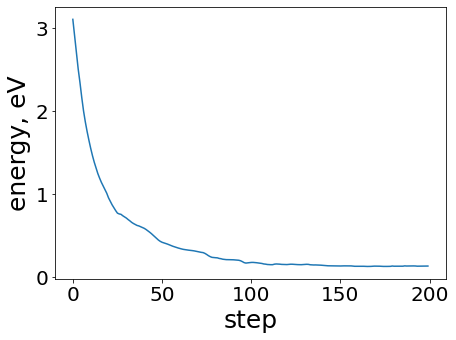

In [ ]:
system = glob.glob("ml-relaxations/is2rs-test/*.traj")[0]
ml_trajectory = ase.io.read(system, ":")

energies = [atom.get_potential_energy() for atom in ml_trajectory]

plt.figure(figsize=(7, 5))
plt.plot(range(len(energies)), energies)
plt.xlabel("step")
plt.ylabel("energy, eV")
system

Qualitatively, the ML relaxation is behaving as expected - decreasing energies over the course of the relaxation.

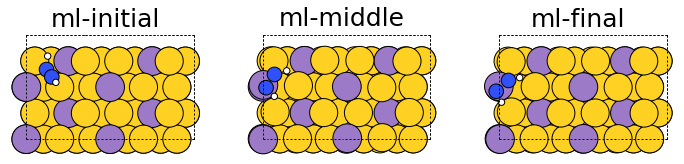

In [ ]:
fig, ax = plt.subplots(1, 3)
labels = ['ml-initial', 'ml-middle', 'ml-final']
for i in range(3):
    ax[i].axis('off')
    ax[i].set_title(labels[i])

ase.visualize.plot.plot_atoms(
    ml_trajectory[0], 
    ax[0], 
    radii=0.8,
    # rotation=("-75x, 45y, 10z")) # uncomment to visualize at different angles
)
ase.visualize.plot.plot_atoms(
    ml_trajectory[100], 
    ax[1], 
    radii=0.8, 
    # rotation=("-75x, 45y, 10z") # uncomment to visualize at different angles
)
ase.visualize.plot.plot_atoms(
    ml_trajectory[-1], 
    ax[2], 
    radii=0.8,
    # rotation=("-75x, 45y, 10z"), # uncomment to visualize at different angles
)


Qualitatively, the generated structures seem reasonable with no obvious issues we had previously mentioned to look out for.

# Model development <a name="model-dev"></a>

In this section, we will walk through how to develop a simple Graph Neural Network model on the S2EF-200k dataset.

Let's begin by setting up some imports and boilerplate config parameters.

## Imports

In [ ]:
import torch

from typing import Optional

from ocpmodels.trainers import ForcesTrainer
from ocpmodels import models
from ocpmodels.common import logger
from ocpmodels.common.utils import setup_logging, get_pbc_distances
from ocpmodels.common.registry import registry

from ocpmodels.models.gemnet.layers.radial_basis import PolynomialEnvelope

from torch_geometric.nn.models.schnet import GaussianSmearing
from torch_scatter import scatter

In [ ]:
setup_logging()

# Dataset paths
train_src = "data/s2ef/train_200k"
val_src = "data/s2ef/val"

# Configs
task = {
    'dataset': 'trajectory_lmdb', # dataset used for the S2EF task
    'description': 'Regressing to energies and forces for DFT trajectories from OCP',
    'type': 'regression',
    'metric': 'mae',
    'labels': ['potential energy'],
    'grad_input': 'atomic forces',
    'train_on_free_atoms': True,
    'eval_on_free_atoms': True
}

# Optimizer
optimizer = {
    'batch_size': 16, # if hitting GPU memory issues, lower this
    'eval_batch_size': 8,
    'num_workers': 8,
    'lr_initial': 0.0001,
    'scheduler': "ReduceLROnPlateau",
    'mode': "min",
    'factor': 0.8,
    'patience': 3,
    'max_epochs': 80,
    'max_epochs': 5,
    'force_coefficient': 100,
}

# Dataset
dataset = [
  {'src': train_src, 'normalize_labels': True, 'target_mean':  -0.7554450631141663, 'target_std': 2.887317180633545, 'grad_target_mean': 0.0, 'grad_target_std': 2.887317180633545}, # train set
  {'src': val_src},
]

## Atom and Edge Embeddings

Each atom is represented as a node with its features computed using a simple `torch.nn.Embedding` layer on the atomic number.

All pairs of atoms with a defined cutoff radius (=6A) are assumed to have edges between them, with their features computed as the concatenation of 1) a Gaussian expansion of the distance between the atoms, and the 2) source and 3) target
node features.

We will use the `GaussianSmearing` layer (reproduced below) from the PyTorch Geometric library for computing distance features:

```
class GaussianSmearing(torch.nn.Module):
    def __init__(self, start=0.0, stop=5.0, num_gaussians=50):
        super(GaussianSmearing, self).__init__()
        offset = torch.linspace(start, stop, num_gaussians)
        self.coeff = -0.5 / (offset[1] - offset[0]).item()**2
        self.register_buffer('offset', offset)

    def forward(self, dist):
        dist = dist.view(-1, 1) - self.offset.view(1, -1)
        return torch.exp(self.coeff * torch.pow(dist, 2))
```

In [ ]:
class AtomEmbedding(torch.nn.Module):
    def __init__(self, emb_size):
        super().__init__()
        self.embeddings = torch.nn.Embedding(83, emb_size) # We go up to Bi (83).

    def forward(self, Z):
        h = self.embeddings(Z - 1)  # -1 because Z.min()=1 (==Hydrogen)
        return h

class EdgeEmbedding(torch.nn.Module):
    def __init__(self, atom_emb_size, edge_emb_size, out_size):
        super().__init__()
        in_features = 2 * atom_emb_size + edge_emb_size
        self.dense = torch.nn.Sequential(
            torch.nn.Linear(in_features, out_size, bias=False),
            torch.nn.SiLU()
        )

    def forward(self, h, m_rbf, idx_s, idx_t,
    ):
        h_s = h[idx_s]  # indexing source node, shape=(num_edges, emb_size)
        h_t = h[idx_t]  # indexing target node, shape=(num_edges, emb_size)

        m_st = torch.cat([h_s, h_t, m_rbf], dim=-1)  # (num_edges, 2 * atom_emb_size + edge_emb_size)
        m_st = self.dense(m_st)  # (num_edges, out_size)
        return m_st

class RadialBasis(torch.nn.Module):
    def __init__(self, num_radial: int, cutoff: float, env_exponent: int = 5):
        super().__init__()
        self.inv_cutoff = 1 / cutoff
        self.envelope = PolynomialEnvelope(env_exponent)
        self.rbf = GaussianSmearing(start=0, stop=1, num_gaussians=num_radial)

    def forward(self, d):
        d_scaled = d * self.inv_cutoff
        env = self.envelope(d_scaled)
        return env[:, None] * self.rbf(d_scaled)  # (num_edges, num_radial)

## Message passing 

We start by implementing a very simple message-passing scheme to predict system energy and forces.

Given the node and edge features, we sum up edge features for all edges $e_{ij}$ connecting node $i$ to its neighbors $j$, and pass the resultant vector through a fully-connected layer to project it down to a scalar. This gives us a scalar energy contribution for each node $i$ in the structure. We then sum up all node energy contributions to predict the overall system energy.

Similarly, to predict forces, we pass edge features through a fully-connected layer to project it down to a scalar representing the force magnitude per edge $e_{ij}$. We can then sum up these force magnitudes based on the original edge directions to predict the resultant force vector per node $i$.

In [ ]:
@registry.register_model("simple")
class SimpleAtomEdgeModel(torch.nn.Module):
    def __init__(self, num_atoms, bond_feat_dim, num_targets, emb_size=64, num_radial=64, cutoff=6.0, env_exponent=5):
        super().__init__()

        self.radial_basis = RadialBasis(
            num_radial=num_radial,
            cutoff=cutoff,
            env_exponent=env_exponent,
        )

        self.atom_emb = AtomEmbedding(emb_size)
        self.edge_emb = EdgeEmbedding(emb_size, num_radial, emb_size)

        self.out_energy = torch.nn.Linear(emb_size, 1)
        self.out_forces = torch.nn.Linear(emb_size, 1)

    def forward(self, data):
        batch = data.batch
        atomic_numbers = data.atomic_numbers.long()
        edge_index = data.edge_index
        cell_offsets = data.cell_offsets
        neighbors = data.neighbors

        # computing edges and distances taking periodic boundary conditions into account
        out = get_pbc_distances(
            data.pos,
            edge_index,
            data.cell,
            cell_offsets,
            neighbors,
            return_offsets=True,
            return_distance_vec=True,
        )

        edge_index = out["edge_index"]
        D_st = out["distances"]
        V_st = -out["distance_vec"] / D_st[:, None]

        idx_s, idx_t = edge_index

        # embed atoms
        h_atom = self.atom_emb(atomic_numbers)

        # gaussian expansion of distances D_st
        m_rbf = self.radial_basis(D_st)
        # embed edges
        m = self.edge_emb(h_atom, m_rbf, idx_s, idx_t)

        # read out energy
        # 
        # x_E_i = \sum_j m_ji -- summing up edge features m_ji for all neighbors j
        # of node i to predict node i's energy contribution.
        x_E = scatter(m, idx_t, dim=0, dim_size=h_atom.shape[0], reduce="sum")
        x_E = self.out_energy(x_E)

        # E = \sum_i x_E_i
        num_systems = torch.max(batch)+1
        E = scatter(x_E, batch, dim=0, dim_size=num_systems, reduce="add")
        # (num_systems, 1)

        # read out forces
        # 
        # x_F is the force magnitude per edge, we multiply that by the direction of each edge ji,
        # and sum up all the vectors to predict the resultant force on node i
        x_F = self.out_forces(m)
        F_st_vec = x_F[:, :, None] * V_st[:, None, :]
        F = scatter(F_st_vec, idx_t, dim=0, dim_size=atomic_numbers.size(0), reduce="add")
        # (num_atoms, num_targets, 3)
        F = F.squeeze(1)

        return E, F

    @property
    def num_params(self):
        return sum(p.numel() for p in self.parameters())

## Training the model

In [ ]:
model_params = {
    'name': 'simple',
    'emb_size': 256,
    'num_radial': 128,
    'cutoff': 6.0,
    'env_exponent': 5,
}

trainer = ForcesTrainer(
    task=task,
    model=model_params,
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-simple",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    is_vis=False,
    print_every=20,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
)

trainer.train()

If you've wired everything up correctly, this model should be relatively small (~185k params) and achieve a force MAE of 0.0815, force cosine of 0.0321, energy MAE of 2.2772 in 2 epochs.

We encourage the reader to try playing with the embedding size, cutoff radius, number of gaussian basis functions, and polynomial envelope exponent to see how it affects performance.

## Incorporating triplets and training GemNet-T

Recall how this model computes edge embeddings based only on a Gaussian expansion of edge distances.

To better capture 3D geometry, we should also embed angles formed by triplets or quadruplets of atoms. A model that incorporates this idea and works quite well is GemNet (Klicpera et al., NeurIPS 2021); see the following figure.

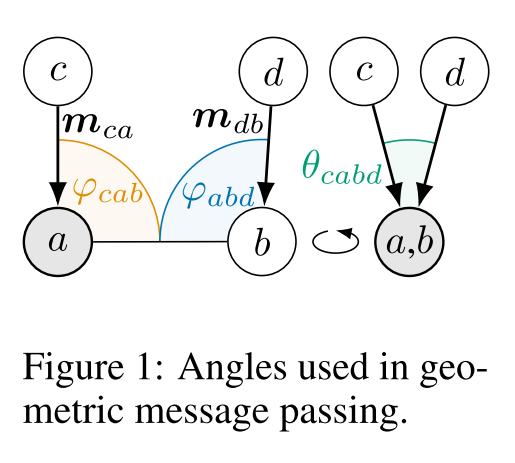

You can train a GemNet-T (T = triplets) on S2EF-200k using the following config.

Note that this is a significantly bulkier model (~3.4M params) than the one we developed above and will take longer to train.

In [ ]:
model_params = {
    'name': 'gemnet_t',
    'num_spherical': 7,
    'num_radial': 128,
    'num_blocks': 1,
    'emb_size_atom': 256,
    'emb_size_edge': 256,
    'emb_size_trip': 64,
    'emb_size_rbf': 16,
    'emb_size_cbf': 16,
    'emb_size_bil_trip': 64,
    'num_before_skip': 1,
    'num_after_skip': 1,
    'num_concat': 1,
    'num_atom': 3,
    'cutoff': 6.0,
    'max_neighbors': 50,
    'rbf': {'name': 'gaussian'},
    'envelope': {'name': 'polynomial', 'exponent': 5},
    'cbf': {'name': 'spherical_harmonics'},
    'extensive': True,
    'otf_graph': False,
    'output_init': 'HeOrthogonal',
    'activation': 'silu',
    'scale_file': 'configs/s2ef/all/gemnet/scaling_factors/gemnet-dT.json',
    'regress_forces': True,
    'direct_forces': True,
}

trainer = ForcesTrainer(
    task=task,
    model=model_params,
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-gemnet-t",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    is_vis=False,
    print_every=20,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
)

trainer.train()

This model should achieve a force MAE of 0.0668, a force cosine of 0.1180, and an energy MAE of 0.8106 in 2 epochs, significantly better than our simple model.

Again, we encourage the reader to try playing with no. of blocks, choice of basis functions, the various embedding sizes to develop intuition for the interplay between these hyperparameters.

# (Optional) OCP Calculator <a name="calc"></a>

For those interested in using our pretrained models for other applications, we provide an [ASE](https://wiki.fysik.dtu.dk/ase/#:~:text=The%20Atomic%20Simulation%20Environment%20(ASE,under%20the%20GNU%20LGPL%20license.)-compatible Calculator to interface with ASE's functionality.

## Download pretrained checkpoint

We have released checkpoints of all the models on the leaderboard [here](https://github.com/Open-Catalyst-Project/ocp/blob/master/MODELS.md). These trained models can be used as an ASE calculator for various calculations.

For this tutorial we download our current best model checkpoint: GemNet-T

In [ ]:
!wget -q https://dl.fbaipublicfiles.com/opencatalystproject/models/2021_08/s2ef/gemnet_t_direct_h512_all.pt
checkpoint_path = "/content/ocp/gemnet_t_direct_h512_all.pt"

## Using the OCP Calculator


In [ ]:
from ocpmodels.common.relaxation.ase_utils import OCPCalculator
import ase.io
from ase.optimize import BFGS
from ase.build import fcc100, add_adsorbate, molecule
import os
from ase.constraints import FixAtoms

# Construct a sample structure
adslab = fcc100("Cu", size=(3, 3, 3))
adsorbate = molecule("C3H8")
add_adsorbate(adslab, adsorbate, 3, offset=(1, 1))
tags = np.zeros(len(adslab))
tags[18:27] = 1
tags[27:] = 2
adslab.set_tags(tags)
cons= FixAtoms(indices=[atom.index for atom in adslab if (atom.tag == 0)])
adslab.set_constraint(cons)
adslab.center(vacuum=13.0, axis=2)
adslab.set_pbc(True)

config_yml_path = "configs/s2ef/all/gemnet/gemnet-dT.yml"

# Define the calculator
calc = OCPCalculator(config_yml=config_yml_path, checkpoint=checkpoint_path)

# Set up the calculator
adslab.calc = calc

os.makedirs("data/sample_ml_relax", exist_ok=True)
opt = BFGS(adslab, trajectory="data/sample_ml_relax/toy_c3h8_relax.traj")

opt.run(fmax=0.05, steps=100)

amp: false
cmd:
  checkpoint_dir: /content/ocp/checkpoints/2021-11-22-18-03-44
  commit: bc04a90
  identifier: ''
  logs_dir: /content/ocp/logs/tensorboard/2021-11-22-18-03-44
  print_every: 100
  results_dir: /content/ocp/results/2021-11-22-18-03-44
  seed: null
  timestamp_id: 2021-11-22-18-03-44
dataset: null
gpus: 0
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cbf:
    name: spherical_harmonics
  cutoff: 6.0
  direct_forces: true
  emb_size_atom: 512
  emb_size_bil_trip: 64
  emb_size_cbf: 16
  emb_size_edge: 512
  emb_size_rbf: 16
  emb_size_trip: 64
  envelope:
    exponent: 5
    name: polynomial
  extensive: true
  max_neighbors: 50
  num_after_skip: 2
  num_atom: 3
  num_before_skip: 1
  num_blocks: 3
  num_concat: 1
  num_radial: 128
  num_spherical: 7
  otf_graph: true
  output_init: HeOrthogonal
  rbf:
    name: gaussian
  regress_forces: true
  scale_file: configs/s2ef/all/gemnet/scaling_factors/gemnet-dT.json
optim:
  batch_size: 32
  clip_gr

True

<a name="lmdb"></a>
# (Optional) Creating your own LMDBs for use in the OCP repository 

In order to interface with our repository, the data mustbe structured and organized in a specific format. Below we walk you through on how to create such datasets with your own non-OC20 data that may help with your research.

For this tutorial we use the toy C3H8 trajectory we previously generated [here](#data-description).



#### Initial Structure to Relaxed Energy (IS2RE) LMDBs
IS2RE/IS2RS LMDBs utilize the SinglePointLmdb dataset. This dataset expects the data to be contained in a **single** LMDB file. In addition to the attributes defined by AtomsToGraph, the following attributes must be added for the IS2RE/IS2RS tasks:

- pos_relaxed: Relaxed adslab positions
- sid: Unique system identifier, arbitrary
- y_init: Initial adslab energy, formerly Data.y
- y_relaxed: Relaxed adslab energy
- tags (optional): 0 - subsurface, 1 - surface, 2 - adsorbate


As a demo, we will use the above generated data to create an IS2R* LMDB file.


In [ ]:
from ocpmodels.preprocessing import AtomsToGraphs

"""
args description:

max neigh (int): maximum number of neighors to be considered while constructing a graph
radius (int): Neighbors are considered only within this radius cutoff in Angstrom
r_energy (bool): Stored energy value in the Data object; False for test data
r_forces (bool): Stores forces value in the Data object; False for test data
r_distances (bool): pre-calculates distances taking into account PBC and max neigh/radius
  If you set it to False, make sure to add "otf_graph = True" under models in config for runs
r_fixed (bools): True if you want to fix the subsurface atoms
"""

a2g = AtomsToGraphs(
    max_neigh=50,
    radius=6,
    r_energy=True,    
    r_forces=True,
    r_distances=False, 
    r_fixed=True,
)

In [ ]:
import lmdb

"""
For most cases one just needs to change the name of the lmdb as they require.
Make sure to give the entire path in the config (with .lmdb) for IS2RE tasks
"""

db = lmdb.open(
    "data/toy_C3H8.lmdb",
    map_size=1099511627776 * 2,
    subdir=False,
    meminit=False,
    map_async=True,
)

In [ ]:
"""
This method converts extracts all features from trajectory file and convert to Data Object
"""

def read_trajectory_extract_features(a2g, traj_path):
    # Read the traj file
    traj = ase.io.read(traj_path, ":")

    # Get tags if you had defined those in the atoms object, if not skip this line
    tags = traj[0].get_tags()

    # Collect only initial and final image as this is IS2RS task
    images = [traj[0], traj[-1]]

    # Converts a list of atoms object to a list of Data object using a2g defined above
    data_objects = a2g.convert_all(images, disable_tqdm=True)

    # Add tags to the data objects if you have them (we would suggest to do so), if not skip this
    data_objects[0].tags = torch.LongTensor(tags)
    data_objects[1].tags = torch.LongTensor(tags)

    return data_objects

In [ ]:
import torch
import pickle
system_paths = ["data/toy_c3h8_relax.traj"] # specify list of trajectory files you wish to write to LMDBs
idx = 0

for system in system_paths:
    # Extract Data object
    data_objects = read_trajectory_extract_features(a2g, system)
    initial_struc = data_objects[0]
    relaxed_struc = data_objects[1]
    
    initial_struc.y_init = initial_struc.y # subtract off reference energy, if applicable
    del initial_struc.y
    initial_struc.y_relaxed = relaxed_struc.y # subtract off reference energy, if applicable
    initial_struc.pos_relaxed = relaxed_struc.pos
    
    # Filter data if necessary
    # OCP filters adsorption energies > |10| eV
    
    initial_struc.sid = idx  # arbitrary unique identifier 
    
    # no neighbor edge case check
    if initial_struc.edge_index.shape[1] == 0:
        print("no neighbors", traj_path)
        continue
    
    # Write to LMDB
    txn = db.begin(write=True)
    txn.put(f"{idx}".encode("ascii"), pickle.dumps(initial_struc, protocol=-1))
    txn.commit()
    db.sync()
    idx += 1

db.close()

In [ ]:
from ocpmodels.datasets import SinglePointLmdbDataset

# SinglePointLmdbDataset is out custom Dataset method to read the lmdbs as Data objects. Note that we need to give the entire path (including lmdb) for IS2RE
dataset = SinglePointLmdbDataset({"src": "data/toy_C3H8.lmdb"})

print("Size of the dataset created:", len(dataset))
print(dataset[0])

Size of the dataset created: 1
Data(atomic_numbers=[38], cell=[1, 3, 3], cell_offsets=[1733, 3], edge_index=[2, 1733], fixed=[38], force=[38, 3], natoms=38, pos=[38, 3], pos_relaxed=[38, 3], sid=0, tags=[38], y_init=15.80469962027714, y_relaxed=8.358921451420816)


#### Structure to Energy and Forces (S2EF) LMDBs

S2EF LMDBs utilize the TrajectoryLmdb dataset. This dataset expects a directory of LMDB files. In addition to the attributes defined by AtomsToGraph, the following attributes must be added for the S2EF task:

- tags (optional): 0 - subsurface, 1 - surface, 2 - adsorbate
- fid: Frame index along the trajcetory
- sid- sid: Unique system identifier, arbitrary

Additionally, a "length" key must be added to each LMDB file.

As a demo, we will use the above generated data to create an S2EF LMDB dataset

In [ ]:
os.makedirs("data/s2ef", exist_ok=True)
db = lmdb.open(
    "data/s2ef/toy_C3H8.lmdb",
    map_size=1099511627776 * 2,
    subdir=False,
    meminit=False,
    map_async=True,
)

In [ ]:
from tqdm import tqdm
tags = traj[0].get_tags()
data_objects = a2g.convert_all(traj, disable_tqdm=True)


for fid, data in tqdm(enumerate(data_objects), total=len(data_objects)):
    #assign sid
    data.sid = torch.LongTensor([0])
    
    #assign fid
    data.fid = torch.LongTensor([fid])
    
    #assign tags, if available
    data.tags = torch.LongTensor(tags)
    
    # Filter data if necessary
    # OCP filters adsorption energies > |10| eV and forces > |50| eV/A

    # no neighbor edge case check
    if data.edge_index.shape[1] == 0:
        print("no neighbors", traj_path)
        continue

    txn = db.begin(write=True)
    txn.put(f"{fid}".encode("ascii"), pickle.dumps(data, protocol=-1))
    txn.commit()
    
txn = db.begin(write=True)
txn.put(f"length".encode("ascii"), pickle.dumps(len(data_objects), protocol=-1))
txn.commit()


db.sync()
db.close()

100%|██████████| 101/101 [00:00<00:00, 129.56it/s]


# Running on command line [Preferred way to train models] <a name="cmd"></a>

The previous sections of this notebook are intended to demonstrate the inner workings of our codebase. For regular training, we suggest that you train and evaluate on command line.

1. Clone our repo at https://github.com/Open-Catalyst-Project/ocp and set up the environment according to the readme.
2. Download relevant data ([see above for info](https://colab.research.google.com/drive/1oGZcrakB4Pbj8Xq74lSvcRDUHw9L-Dh5#scrollTo=jXoiLncsU3pe)).


3. In the config file, modify the path of the data [train](https://github.com/Open-Catalyst-Project/ocp/blob/master/configs/is2re/10k/base.yml#L4) [val](https://github.com/Open-Catalyst-Project/ocp/blob/master/configs/is2re/10k/base.yml#L8), [normalization parameters](https://github.com/Open-Catalyst-Project/ocp/blob/master/configs/is2re/10k/base.yml#L5-L7)  as well as any other [model](https://github.com/Open-Catalyst-Project/ocp/blob/master/configs/is2re/10k/dimenet_plus_plus/dpp.yml#L4-L16) or [training](https://github.com/Open-Catalyst-Project/ocp/blob/master/configs/is2re/10k/dimenet_plus_plus/dpp.yml#L23-L35) args. 

For a simple example, we'll train DimeNet++ on IS2RE demo data: \
a. Modify the train data path in `/contents/ocp/configs/is2re/10k/base.yml` in 
Line 4 to `/contents/ocp/data/is2re/train_10k/data.lmdb` and val data path in Line 8 to `/contents/ocp/data/is2re/val_2k/data.lmdb`. \
b. Calculate the mean and std for train data and modify Lines 6-7 respectively \
c. We can change the model parameters in `/contents/ocp/configs/is2re/10k/dimenet_plus_plus/dpp.yml` and we suggest you to change the lr_milestones and warmup_steps as the data here is smaller (these need to be tuned for every dataset).


4. Train: `python main.py --mode train --config-yml configs/is2re/10k/dimenet_plus_plus/dpp.yml --identifier dpp_is2re_sample`


In [ ]:
# Optional block to try command line training 
# Note that config args can be added in the command line. For example, --optim.batch_size=1

5. Add a data path as a test set to `configs/is2re/10k/base.yml`
6. Run predictions with the trained model: 
`python main.py --mode predict --config-yml configs/is2re/10k/dimenet_plus_plus/dpp.yml --checkpoint checkpoints/[datetime]-dpp_is2re_sample/checkpoint.pt`
7. View energy predictions at `results/[datetime]/is2re_predictions.npz`

For more information on how to train and evaluate, see [this readme](https://github.com/Open-Catalyst-Project/ocp/blob/master/TRAIN.md). For checkpoints of publicly available trained models, see [MODELS.md](https://github.com/Open-Catalyst-Project/ocp/blob/master/MODELS.md).

# Limitations <a name="limit"></a>
The OpenCatalyst project is motivated by the problems we face due to climate change, many of which require innovative solutions to reduce energy usage and replace traditional chemical feedstocks with renewable alternatives. For example, one of the most energy intensive chemical processes is the development of new electrochemical catalysts for ammonia fertilizer production that helped to feed the world’s growing population during the 20th century. This is also an illustrative example of possible unintended consequences as advancements in chemistry and materials may be used for numerous purposes. As ammonia fertilization increased in use, its overuse in today’s farming has led to ocean “dead zones” and its production is very carbon intensive. Knowledge and techniques used to create ammonia were also transferred to the creation of explosives during wartime. We hope to steer the use of ML for atomic simulations to societally-beneficial uses by training and testing our approaches on datasets, such as OC20, that were specifically designed to address chemical reactions useful for addressing climate change.

# Next Steps <a name="steps"></a>

While progress has been well underway - https://opencatalystproject.org/leaderboard.html, a considerable gap still exists between state-of-the-art models and our target goals. We offer some some general thoughts as to next steps for the readers to ponder on or explore:

* GNN depth has consistenly improved model performance. What limitations to depth are there? How far can we push deeper models for OC20? 
* Our best performing models have little to no physical biases encoded. Can we incorporate such biases to improve our models? Experiments with physically inspired embeddings have had no advantage vs. random initializations, are there better ways to incorporate this information into the models?
* Uncertainty estimation will play an important role in later stages of the project when it comes to large scale screening. How can we get reliable uncertainty estimates from large scale GNNs?
* Are we limited to message-passing GNNs? Can we leverage alternative architectures for similiar or better performance?
* Trajectories are nothing more than sequential data points. How can we use sequential modeling techniques to model the full trajectory?

OC20 is a large and diverse dataset with many splits. For those with limited resources but unsure where to start, we provide some general recommendations:

* The IS2RE-direct task is a great place to start. With the largest training set containing ~460k data points, this task is easily accesible for those with even just a single GPU.
* Those interested in the more general S2EF task don't need to train on the All set to get meaningful performance.
    * Results on the 2M dataset are often sufficient to highlight model improvements.
    * For a fixed compute budget (e.g. fixed number of steps), training on the All set often leads to better performance.
* The S2EF 200k dataset is fairly noisy, trying to find meaningful trends using this dataset can be difficult.



<a name="references"></a>
# References

* Open Catalyst codebase: https://github.com/Open-Catalyst-Project/ocp/
* Open Catalyst webpage: https://opencatalystproject.org/
* [Electrocatalysis white paper](https://arxiv.org/pdf/2010.09435.pdf): C. Lawrence Zitnick, Lowik Chanussot, Abhishek Das, Siddharth Goyal, Javier Heras-Domingo, Caleb Ho, Weihua Hu, Thibaut Lavril, Aini Palizhati, Morgane Riviere, Muhammed Shuaibi, Anuroop Sriram, Kevin Tran, Brandon Wood, Junwoong Yoon, Devi Parikh, Zachary Ulissi: “An Introduction to Electrocatalyst Design using Machine Learning for Renewable Energy Storage”, 2020; arXiv:2010.09435.
* [OC20 dataset paper](https://arxiv.org/pdf/2010.09990.pdf): L. Chanussot, A. Das, S. Goyal, T. Lavril, M. Shuaibi, M. Riviere, K. Tran, J. Heras-Domingo, C. Ho, W. Hu, A. Palizhati, A. Sriram, B. Wood, J. Yoon, D. Parikh, C. L. Zitnick, and Z. Ulissi. The Open Catalyst 2020 (oc20) dataset and community challenges. ACS Catalysis, 2021.
* [Gemnet model:](https://arxiv.org/abs/2106.08903) Johannes Klicpera, Florian Becker, and Stephan Günnemann. Gemnet: Universal directional graph neural networks for molecules, 2021.


